Títulio: Use of the generalized z-value concept to study the effects of temperature, NaCl concentration and pH on Pichia anomala, a yeast related to table olive fermentation

Nombre: Juan Manuel Gutiérrez García 

Fecha: enero 2021

In [ ]:
# cargar librerías 
library(rsm)
library(tidyverse)
library(modelr)
library(ggfortify)
library(directlabels)

In [3]:
# cargar los datos
data <- read.csv(file = "datos/2006--USE OF THE GENERALIZED Z-VALUE CONCEPT TO STUDY THE EFFECTS OF TEMPERATURE.csv")
str(data)

'data.frame':	20 obs. of  5 variables:
 $ temp : num  10 10 10 10 20 20 20 20 6.6 26.8 ...
 $ NaCl : num  3 3 7 7 3 3 7 7 5 5 ...
 $ pH   : num  3 4.2 3 4.2 3 4.2 3 4.2 3.6 3.6 ...
 $ mu   : num  0.08 0.09 0.04 0.05 0.22 0.27 0.11 0.14 0.03 0.28 ...
 $ landa: num  37.2 29.1 85 46.4 6.3 7 21.6 6.2 75.7 5.9 ...


In [8]:
# mostrar datos
data

temp,NaCl,pH,mu,landa
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10.0,3.00,3.0,0.08,37.2
10.0,3.00,4.2,0.09,29.1
10.0,7.00,3.0,0.04,85.0
10.0,7.00,4.2,0.05,46.4
20.0,3.00,3.0,0.22,6.3
20.0,3.00,4.2,0.27,7.0
20.0,7.00,3.0,0.11,21.6
20.0,7.00,4.2,0.14,6.2
6.6,5.00,3.6,0.03,75.7


In [4]:
# análizar los datos con el modelo 
lm1 <- rsm(log2(mu) ~ SO(temp) + NaCl, data = data)

In [5]:
# resumen del modelo 
summary(lm1)


Call:
rsm(formula = log2(mu) ~ SO(temp) + NaCl, data = data)

              Estimate Std. Error  t value  Pr(>|t|)    
(Intercept) -6.0135001  0.4818411 -12.4803 1.163e-09 ***
temp         0.3443052  0.0571123   6.0286 1.755e-05 ***
temp^2      -0.0059826  0.0017259  -3.4664  0.003182 ** 
NaCl        -0.1781508  0.0318582  -5.5920 4.050e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Multiple R-squared:  0.9293,	Adjusted R-squared:  0.9161 
F-statistic: 70.13 on 3 and 16 DF,  p-value: 2.012e-09

Analysis of Variance Table

Response: log2(mu)
            Df Sum Sq Mean Sq  F value    Pr(>F)
FO(temp)     1 9.2675  9.2675 167.0930 6.954e-10
PQ(temp)     1 0.6669  0.6669  12.0235  0.003174
NaCl         1 1.7344  1.7344  31.2703 4.050e-05
Residuals   16 0.8874  0.0555                   
Lack of fit  2 0.1135  0.0568   1.0271  0.383510
Pure error  14 0.7739  0.0553                   

Stationary point of response surface:
    temp 
28.77533 

Eigenanalysis:
eigen

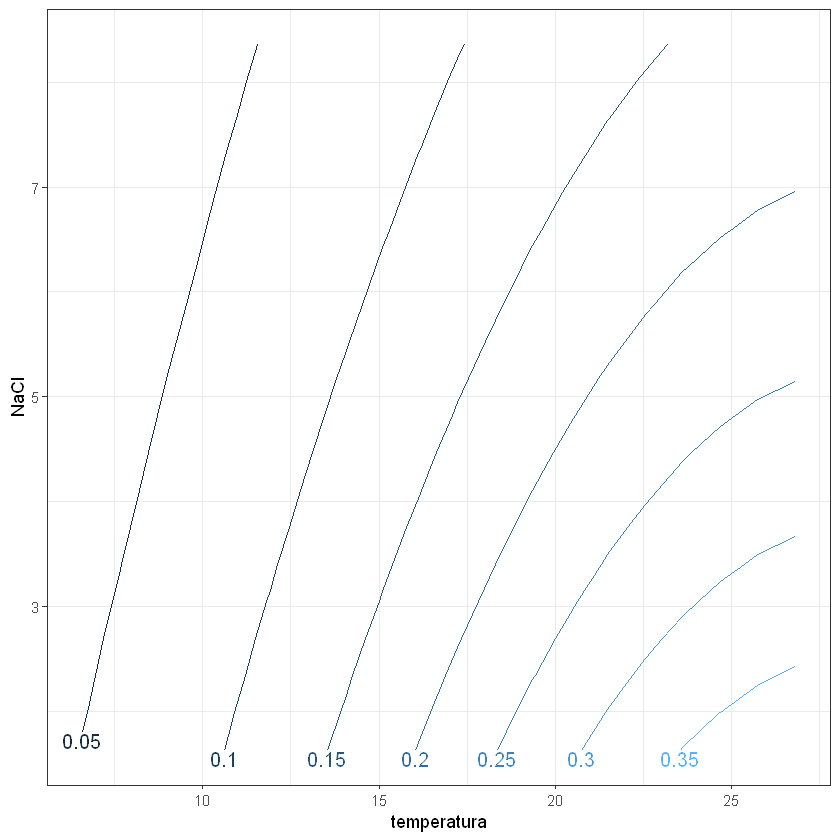

In [13]:
# usar modelo para predecir log2(mu)
grid <- data %>%
        data_grid(temp = seq_range(temp, 20), NaCl = seq_range(NaCl, 20)) %>%
        add_predictions(lm1, "log2mu")

# calcular mu
grid$mu <- 2^{grid$log2mu}

# gráfica de contorno
plot <- ggplot(grid, aes(x = temp, y = NaCl, z = mu, colour = ..level..)) +
        stat_contour() +
        xlab("temperatura") +
        ylab("NaCl") +
        scale_color_continuous(name = "mu") + 
        theme_bw()

plot <- direct.label(plot, "bottom.pieces")
plot

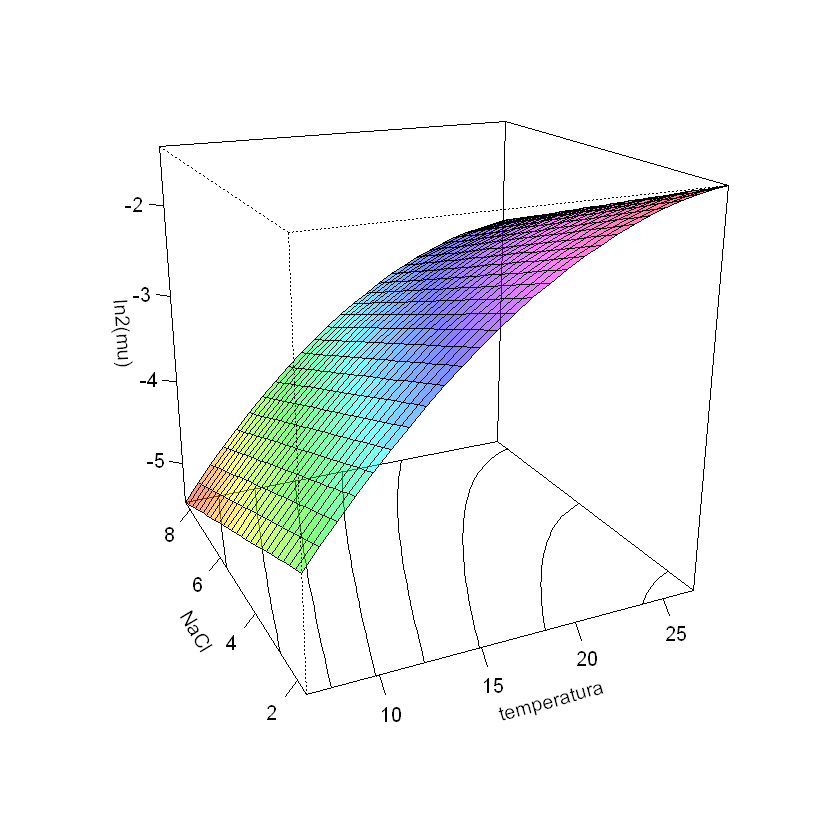

In [14]:
# grafica 3D
persp(lm1, NaCl ~ temp,
      zlab = "ln2(mu)", contours = list(z = "bottom"),
      col = rainbow(100, alpha=0.5),xlabs = c("NaCl","temperatura"))

Warning message:
"`arrange_()` is deprecated as of dplyr 0.7.0.
Please use `arrange()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."

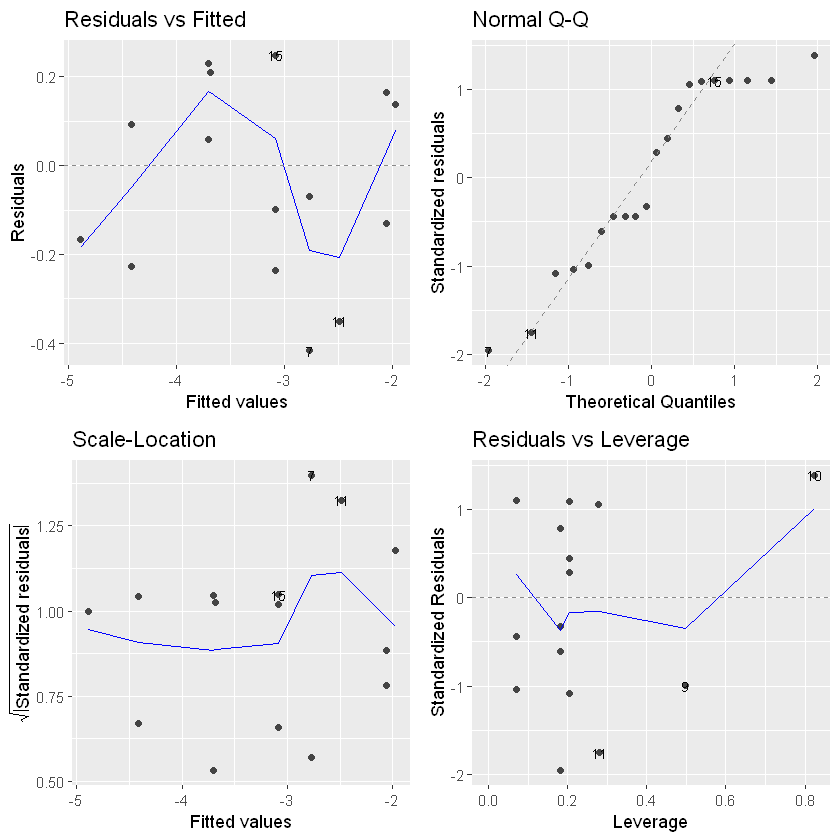

In [16]:
# verificar suposiciones del modelo 
plot <- autoplot(lm1, label.size = 3)
plot

In [17]:
# analizar los datos con segundo modelo 
lm2 <- rsm(log2(landa) ~ FO( temp,NaCl,pH) , data = data)

In [18]:
# resumen del modelo
summary(lm2)


Call:
rsm(formula = log2(landa) ~ FO(temp, NaCl, pH), data = data)

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  9.120159   1.118150  8.1565 4.309e-07 ***
temp        -0.204901   0.028637 -7.1551 2.286e-06 ***
NaCl         0.297092   0.078366  3.7911  0.001603 ** 
pH          -0.927080   0.262240 -3.5352  0.002751 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Multiple R-squared:  0.8299,	Adjusted R-squared:  0.798 
F-statistic: 26.02 on 3 and 16 DF,  p-value: 2.155e-06

Analysis of Variance Table

Response: log2(landa)
                   Df  Sum Sq Mean Sq F value    Pr(>F)
FO(temp, NaCl, pH)  3 26.1982  8.7327 26.0215 2.155e-06
Residuals          16  5.3696  0.3356                  
Lack of fit        11  4.0142  0.3649  1.3462    0.3925
Pure error          5  1.3554  0.2711                  

Direction of steepest ascent (at radius 1):
      temp       NaCl         pH 
-0.2059616  0.2986297 -0.9318799 

Corresponding increment in orig

In [19]:
# predecir valores de log2(lambda) con modelo
grid <- data %>% 
        data_grid(temp = seq_range(temp, 20),
                 NaCl = seq_range(NaCl, 20), 
                 .model = lm2) %>% 
        add_predictions(lm2, "ln2lambda")

# calcular valores de lambda
grid$lambda <- 2^{grid$ln2lambda}

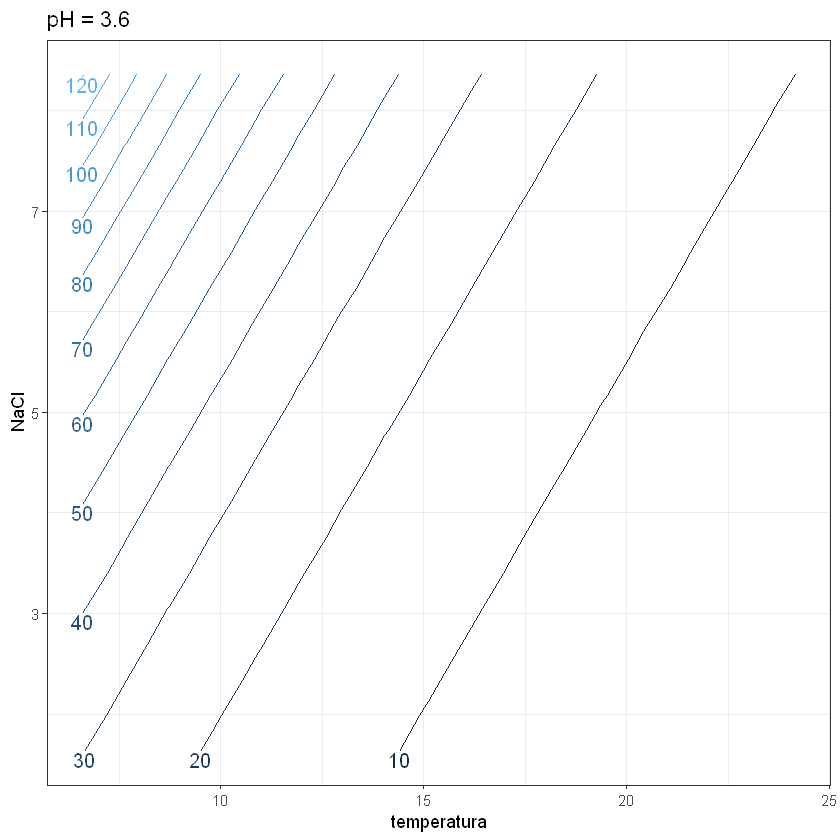

In [20]:
# gráfica de contorno para temperatura y NaCl
plot <- ggplot(data = grid, aes(x = temp, y = NaCl, z = lambda, color = ..level..)) +
        stat_contour() + 
        xlab("temperatura") +
        ylab("NaCl") +
        scale_color_continuous(name = "lambda") +
        theme_bw() +
        labs(title = paste0("pH = ", mean(data$pH)))

plot <- direct.label(plot, "bottom.pieces")
plot

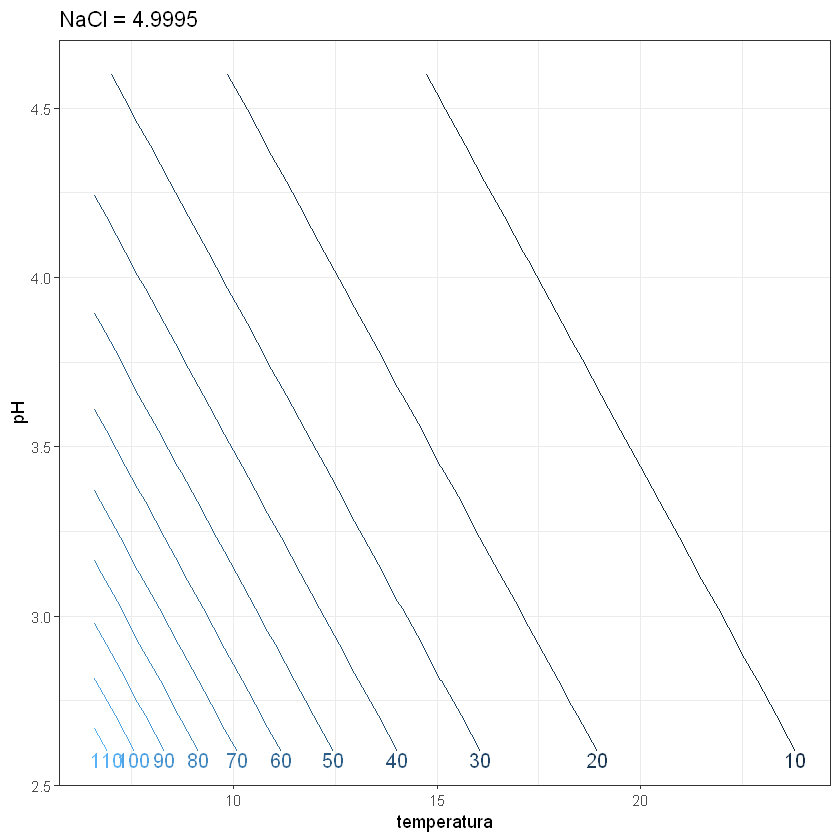

In [22]:
# predecir valor de lambda con modelo
grid <- data %>%
        data_grid(temp = seq_range(temp, 20), 
                  pH = seq_range(pH, 20),
                 .model = lm2) %>%
        add_predictions(lm2, "log2lambda")

# calcular lambda
grid$lambda <- 2^{grid$log2lambda}

# gráfica de contorno para temperatura y pH
plot <- ggplot(data = grid, aes(x = temp, y = pH, z = lambda, color = ..level..)) +
        stat_contour() +
        xlab("temperatura") +
        ylab("pH") +
        theme_bw() +
        labs(title = paste0("NaCl = ", mean(data$NaCl)))

plot <- direct.label(plot, "bottom.pieces")
plot

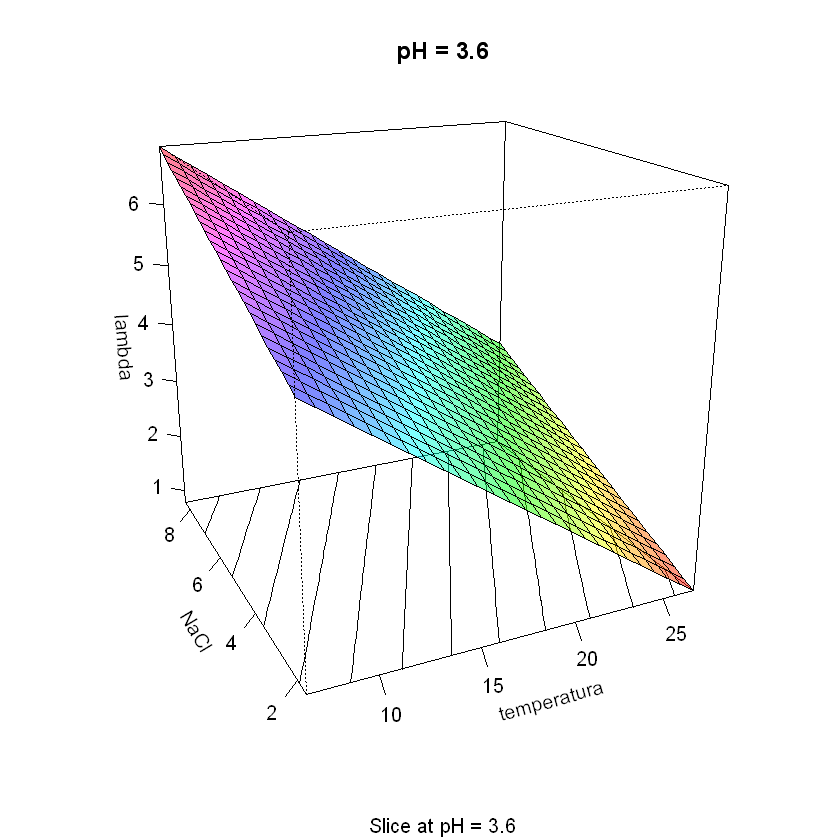

In [24]:
# gráfica 3D
persp(lm2, NaCl ~ temp, at = list(pH = mean(data$pH)), 
     zlab = "lambda", contours = list(z = "bottom"), 
     col = rainbow(100, alpha = 0.5), xlab = c("NaCl", "temperatura"),
     main = paste0("pH = ", mean(data$pH)))

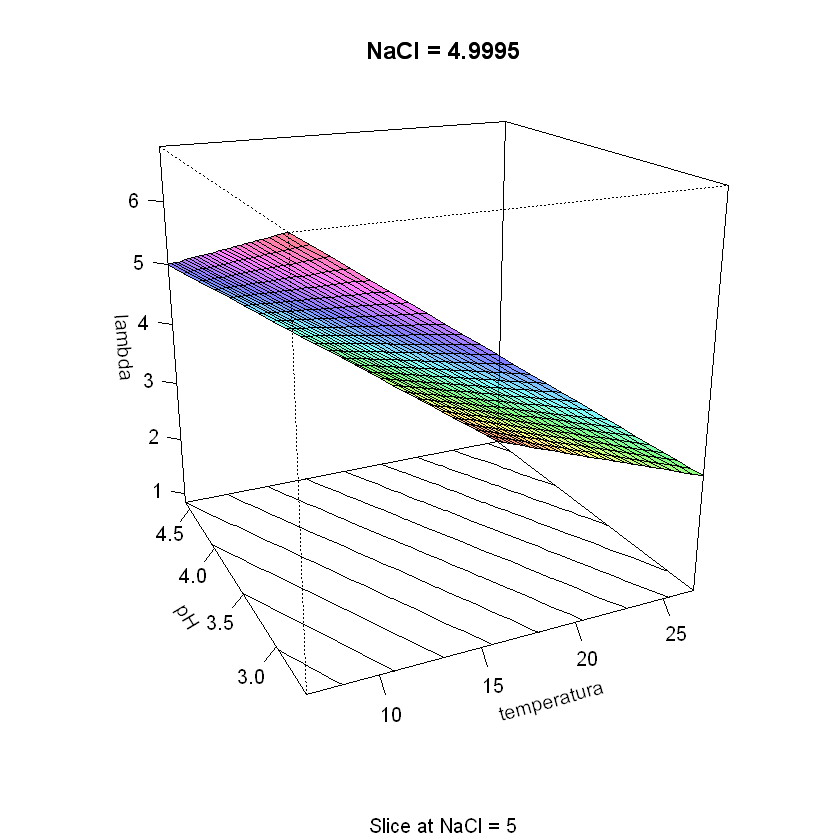

In [25]:
# gráfica 3D para temperatura y pH
persp(lm2, pH ~ temp, at = list(NaCl = mean(data$NaCl)), 
     zlab = "lambda", contours = list(z = "bottom"), 
     col = rainbow(100, alpha = 0.5), xlabs = c("pH", "temperatura"), 
     main = paste0("NaCl = ", mean(data$NaCl)))

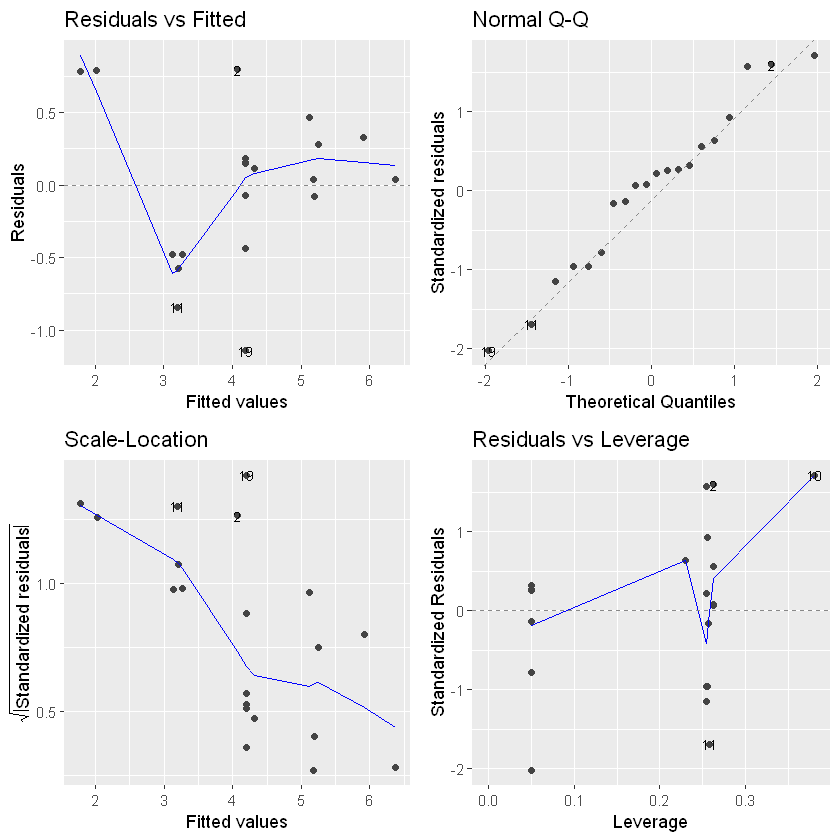

In [26]:
# verificar suposiciones del modelo
autoplot(lm2, label.size = 3)